# Evolent : Beer Dataset Challenge
    Submitted By : Akshay Tilekar
----


# Content
----

1. [Backgroud](#Background)
1. [Initial Setup](#Setup)
1. [Utility Functions](#Utility_Functions)
1. [Data Loading](#Data_Loading)
1. [Sanitization](#Sanitization)
1. [Solutions](#Solutions)

---
## 1. Background

<a id='Background'></a>

---

For this exercise, you will be working with beer data which can be downloaded from here 
https://drive.google.com/open?id=1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq
 
Unzip the file and you should see a CSV file, called “BeerDataScienceProject.csv”

The columns are as :
   1. beer_ABV
   2. beer_beerId
   3. beer_brewerId
   4. beer_name
   5. beer_style
   6. review_appearance
   7. review_palette
   8. review_overall
   9. review_taste
   10. review_profileName
   11. review_aroma
   12. review_text
   13. review_time


You may use any one or more among the following open source programming language(s) (Python, R, C++, Java , Scala , Julia, etc. ) if you like to do so (no “SQL” Based Code). Please provide your answers below the questions. When you submit your answers, please also include the code you used to answer the questions in email and/or provide a link to your code in public repository like github with instructions on how to run it to reproduce your results.  

Answer as many questions as possible
 
Questions: 

1.	Rank top 3 Breweries which produce the strongest beers?
2.	Which year did beers enjoy the highest ratings? 
3.	 Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5.	Which Beer style seems to be the favorite based on Reviews written by users? How does written review compare to overall review score for the beer style?

*Please include all plots you created to complete the project and to explain your results. 


---
## 2 .Setup
<a id='Setup'></a>

---

In [43]:
# For Data Manipulations

import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import re


# For Visualizations

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Visualization Settings
sns.set(style="ticks", color_codes=True)
matplotlib.rcParams['figure.figsize'] = (8, 6)
# matplotlib.rcParams['savefig.facecolor'] = 'w'
matplotlib.rcParams['savefig.dpi'] = 80

#for loader/show percentage operation done
from tqdm import tqdm
tqdm.pandas()

# text analysis

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atilekar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


---
## 3. Utility Functions
<a id='Utility_Functions'></a>

---

In [44]:
# Function to fet the name of the DataFrame

def getDataframeName(data):
    return [x for x in globals() if globals()[x] is data][0]

## 4. Data Loading
<a id='Data_Loading'></a>

In [45]:
import codecs
with codecs.open('BeerDataScienceProject.csv', 'r', encoding='utf-8',errors='ignore') as fdata:
    print((fdata))

In [46]:
# Loading the given Data

beerData = pd.read_csv('BeerDataScienceProject.csv', parse_dates = ['review_time'], engine='python')


## 5. Sanitization
<a id='Sanitization'></a>

In [47]:
beerData.shape

(528870, 13)

In [48]:
beerData.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

  The Columns are as: 
   
   1. beer_ABV : The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol
   2. beer_beerId
   3. beer_brewerId
   4. beer_name
   5. beer_style
   6. review_appearance
   7. review_palette
   8. review_overall
   9. review_taste
   10. review_profileName
   11. review_aroma
   12. review_text
   13. review_time


In [49]:
beerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [50]:
beerData.tail(5)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290
528869,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.0,4.0,jenbys2001,4.0,"I ordered a mug of this beer at Schnitzelhaus,...",1200336367


### B. Checking Unique Columns in Dataframe

In [51]:
for col in beerData.columns:
    if beerData[col].is_unique:
        print(f'Unique Column : {col} ')

### C. Re-Setting the Indexes

In [52]:
beerData = beerData.reset_index()

### D. Checking the Null Counts

In [53]:
beerData.isnull().sum()

index                     0
beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

### E. Dropping the rows having null values

In [54]:
beerData = beerData.dropna()


In [55]:
beerData.isnull().sum()

index                 0
beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

In [56]:
beerData.shape

(508358, 14)

### F. Removing the Duplicate Data
    If a user has rated the same beer more than once, then only keep their highest rating and remove others.



In [57]:
beerData.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time'],
      dtype='object')

In [58]:
beerData.review_profileName.head(2)

0    stcules
1    stcules
Name: review_profileName, dtype: object

In [59]:
# Sort by "review_overall" in descending order

beerData = beerData.sort_values('review_overall', ascending=False)


In [60]:
# Keep the highest rating from each "review_profilename" and drop the rest

beerData = beerData.drop_duplicates(subset= ['review_profileName','beer_beerId'], keep='first')


In [61]:
#checking shape pf non duplicate data. 

beerData.shape


(503700, 14)

In [62]:
# tmp = beerData.copy()

### G. Removing reviews with Ratings <= 0
    Since ratings are on a scale of 1-5, any values in review variables that are less than 1 are not suitable for analysis.

In [63]:

beerData = beerData[(beerData['review_overall'] > 0)]


In [64]:
beerData.shape

(503697, 14)

---
## 6 .Solutions
<a id='Solutions'></a>

---

In [65]:
beerData.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time'],
      dtype='object')

### Question 1 : Rank top 3 Breweries which produce the strongest beers?

In [66]:
beerData.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time'],
      dtype='object')

#### Extracting the relevant columns into new dataframe to use it futher.

In [67]:
abVP_Data = beerData[['beer_brewerId','beer_beerId','beer_name', 'beer_ABV']]

In [68]:
abVP_Data.head()

,beer_brewerId,beer_beerId,beer_name,beer_ABV
492945,132,1339,Hazelnut Brown Nectar,6.2
172728,221,689,Red Stripe Jamaican Lager,4.7
409699,694,15881,Tröegs Nugget Nectar,7.5
517331,113,571,Samuel Smith's Oatmeal Stout,5.0
172704,221,689,Red Stripe Jamaican Lager,4.7


In [69]:
abVP_Data.shape

(503697, 4)

In [70]:
#Applying aggregations over a "beer_ABV" with resoect to "beer_brewerId" and "beer_beerId"

aggrAbvDf = abVP_Data.groupby(['beer_brewerId', 'beer_beerId']).agg({'beer_ABV': [np.size, np.mean]})

In [71]:
aggrAbvDf.head(5)
# Here, the size is corresponds to the number of review logged per unique beer_beerId and
# the mean value tells the mean of the beer_ABV value recorder in the review

beer_ABV     
                              size mean
beer_brewerId beer_beerId              
1             429           1220.0  4.4
              5916            46.0  5.0
              14348            6.0  5.0
              19099            4.0  4.2
              19123            7.0  4.1

In [72]:
# Now aggregating on a brewery level i.e 'beer_ABV' mean for each brewery

beer_ABVmeanDf = aggrAbvDf.groupby(level='beer_brewerId').mean()
beer_ABVmeanDf.columns = ('mean_size', 'mean_beer_ABV')


In [73]:

beer_ABVmeanDf.head(5)


,mean_size,mean_beer_ABV
beer_brewerId,,
1,101.538462,4.876923
3,123.425000,6.237500
5,69.000000,4.837500
10,14.000000,4.625000
14,8.983871,6.588710


In [74]:
# fropping the column 'mean_size' and sorting the dataframe in desceding order

sorted_beer_ABVmeanDf = beer_ABVmeanDf.drop('mean_size', 1).sort_values('mean_beer_ABV', ascending=False).reset_index()

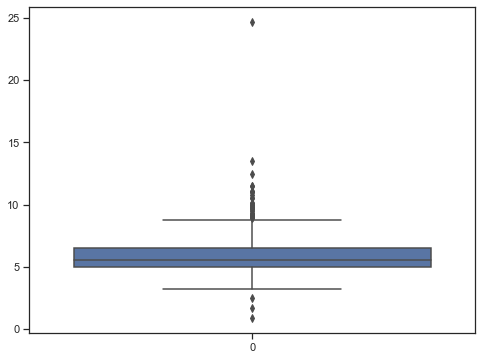

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=sorted_beer_ABVmeanDf['mean_beer_ABV'])

    Observations :
        1. From the above visualization, we can see that the most of the breweries brew around 6% beer_ABV.
        2. The box plot plot shows the anomalous value of around 25% for beer_brewerId "6513" which is far greater than mean beer_ABV
        3. We can’t rule out the slight possibility that the actual strongest beer is one with a null value in column "beer_ABV".

In [76]:
sorted_beer_ABVmeanDf.head(3)

# Below are the top 3 Breweries producing strongest beers considering anomalous value of 24.69% for brewery "6513"

,beer_brewerId,mean_beer_ABV
0,6513,24.690000
1,736,13.500000
2,24215,12.466667


---

### Question 2 : Which year did beers enjoy the highest ratings ? 

In [77]:
beerData.head(2)

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
492945,492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",1221003321
172728,172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",1129192511


In [78]:
beerData.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time'],
      dtype='object')

#### Extracting the relevant columns into new dataframe to use it futher.

In [79]:
review_Data = beerData[['beer_beerId','beer_name','review_overall','review_time']]

In [80]:
review_Data['review_year'] = review_Data.apply(lambda row: datetime.utcfromtimestamp(row.review_time).strftime("%Y"), axis=1)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
review_Data = review_Data.reset_index(drop=True)

In [82]:
review_Data.head(5)

,beer_beerId,beer_name,review_overall,review_time,review_year
0,1339,Hazelnut Brown Nectar,5.0,1221003321,2008
1,689,Red Stripe Jamaican Lager,5.0,1129192511,2005
2,15881,Tröegs Nugget Nectar,5.0,1235006981,2009
3,571,Samuel Smith's Oatmeal Stout,5.0,1203476701,2008
4,689,Red Stripe Jamaican Lager,5.0,1135296352,2005


In [83]:
#
aggrReview_Data = review_Data.groupby(['review_year'], as_index=False)['review_overall'].agg('mean')

In [84]:
aggrReview_Data.head(5)

,review_year,review_overall
0,1998,4.045455
1,1999,4.000000
2,2000,4.241379
3,2001,3.963687
4,2002,3.822060


In [85]:
# sorting the dataframe in desceding order

aggrReview_Data = aggrReview_Data.sort_values(by=['review_overall'], ascending=False)

In [86]:

aggrReview_Data.head(5)


,review_year,review_overall
2,2000,4.241379
0,1998,4.045455
1,1999,4.000000
3,2001,3.963687
12,2010,3.869730


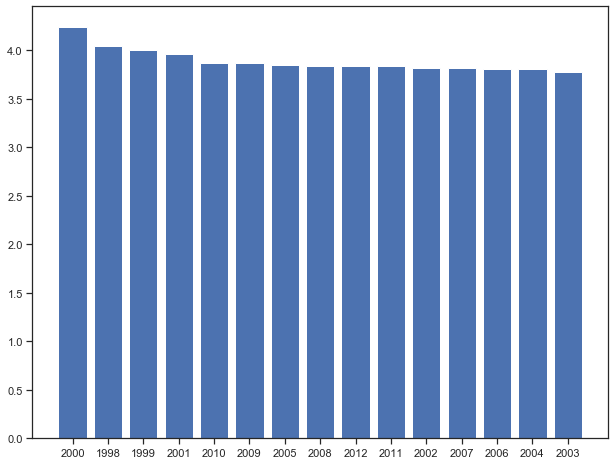

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(aggrReview_Data.review_year,aggrReview_Data.review_overall)
plt.show()

    Observation :
        1. Observing above bar plot we ca say that o year '2000' beer enjoys higest overall ratings of "4.241379"

---

### Question 3 : Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [88]:
beerData.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time'],
      dtype='object')

In [89]:
beerRatingsDf = beerData[['beer_beerId', 'review_appearance', 'review_palette','review_taste', 'review_aroma', 'review_overall']]

In [90]:
beerRatingsDf.head()

,beer_beerId,review_appearance,review_palette,review_taste,review_aroma,review_overall
492945,1339,4.5,3.0,4.5,5.0,5.0
172728,689,5.0,3.0,4.5,4.0,5.0
409699,15881,4.0,4.0,4.5,4.5,5.0
517331,571,4.5,4.5,4.5,4.5,5.0
172704,689,3.0,3.5,4.0,5.0,5.0


In [91]:
beerRatingsAggrDf = beerRatingsDf.groupby('beer_beerId').agg(
        {'beer_beerId':'count',
         'review_aroma':'mean',
         'review_taste':'mean',
         'review_appearance':'mean',
         'review_palette':'mean',
        'review_overall':'mean'})

beerRatingsAggrDf.columns = ('beer_beerId_count','review_aroma','review_taste','review_appearance','review_palette','review_overall')

In [92]:
beerRatingsAggrDf.head()

,beer_beerId_count,review_aroma,review_taste,review_appearance,review_palette,review_overall
beer_beerId,,,,,,
5,420,3.342857,3.323810,3.488095,3.208333,3.554762
6,871,3.645809,3.514351,3.839839,3.517222,3.709529
7,655,3.103817,3.110687,3.251145,3.178626,3.271756
8,68,3.235294,3.301471,3.294118,3.080882,3.647059
9,116,3.043103,3.103448,3.051724,2.853448,3.400862


In [93]:
# Lets observe the correlation between columns.
# Calculate the Pearson's correlation coeff and plot a heatmap.

In [94]:
corVals = beerRatingsAggrDf.corr()
corVals = corVals.iloc[1:6,1:6]

In [95]:
corVals

,review_aroma,review_taste,review_appearance,review_palette,review_overall
review_aroma,1.000000,0.835014,0.660198,0.825980,0.883830
review_taste,0.835014,1.000000,0.682245,0.756271,0.823196
review_appearance,0.660198,0.682245,1.000000,0.669227,0.637603
review_palette,0.825980,0.756271,0.669227,1.000000,0.766905
review_overall,0.883830,0.823196,0.637603,0.766905,1.000000


In [96]:
# masking the upper diagonal matrix
upperMask = np.zeros_like(corVals, dtype=np.bool)

upperMask[np.triu_indices_from(upperMask, k=1)] = True


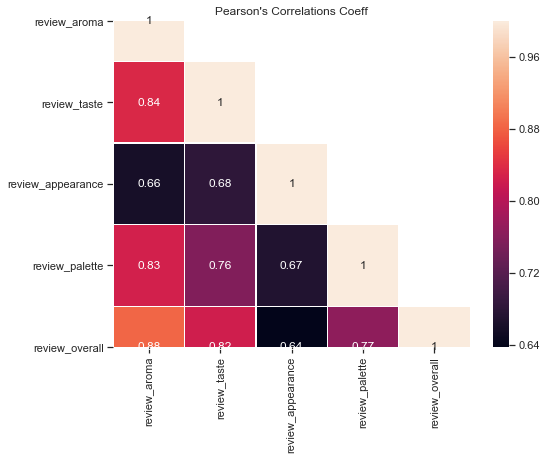

In [97]:
# Plotting hestmap
sns.heatmap(corVals, mask=upperMask, annot=True, linewidths=.3)

plt.title("Pearson's Correlations Coeff")
plt.show()

    Observations:
        1. Observing above heat map we can say that the important factors in deciding overall rating of the beers are aroma(0.88) followeb by taste (0.82) , pallete (0.77) and appearance (0.64)
    

---

### Question 4 : If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

    Observing the dataset, the 'review_overall' field looks the good metric to rank the beers.
    as other features are more towards judging the features of the beers.

In [98]:
beerData.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time'],
      dtype='object')

In [99]:
#CHosing the relevant features to analyze

recommendData = beerData[['beer_brewerId','beer_beerId','beer_name','beer_ABV', 'beer_style', 'review_overall']]

In [100]:
# Counting the number of the reviews with fresoect to each beer

recommendData['review_count'] = recommendData.groupby(['beer_beerId'])['review_overall'].transform('count')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
recommendData.review_count.mean()

# Average review_count is 624

624.2821477991729

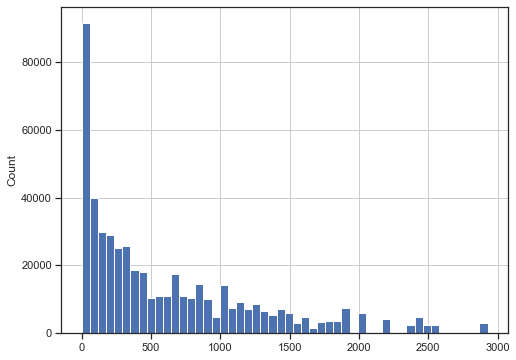

In [102]:
# Plotting Histogram to visualise the distribution review_count 

recommendData.review_count.hist(bins=50)
plt.ylabel('Count')
plt.show()

In [103]:
recommendData.shape

(503697, 7)

In [104]:
#calculating mean review_overall value for each beer Id 

recommendData['review_overall_mean'] = recommendData.groupby(['beer_beerId'])['review_overall'].transform('mean')


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
#COnsidering 1/4 th of avg review count to filter

filteredRecommendData = recommendData[recommendData.review_count >= 150]


In [106]:

aggrFilteredRecommendData = filteredRecommendData.groupby('beer_beerId').head(1).sort_values('review_overall_mean', ascending=False )

# The top 3 suggestions are as below
aggrFilteredRecommendData.head(3)


,beer_brewerId,beer_beerId,beer_name,beer_ABV,beer_style,review_overall,review_count,review_overall_mean
334964,14064,56082,Citra DIPA,8.0,American Double / Imperial IPA,5.0,246,4.630081
484119,388,36316,Cantillon Blåbær Lambik,5.0,Lambic - Fruit,5.0,155,4.625806
378552,27039,16814,Heady Topper,8.0,American Double / Imperial IPA,5.0,443,4.623025


---

### Question 5 : Which Beer style seems to be the favorite based on Reviews written by users? How does written review compare to overall review score for the beer style?

In [107]:
beerData.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_profileName', 'review_aroma', 'review_text',
       'review_time'],
      dtype='object')

In [108]:
# Considering only relevant columns

reviewTextData = beerData[['beer_beerId','beer_name','beer_ABV','beer_style','review_overall','review_text']]

In [111]:
# lets consider the higher reviews only to calculate the polarity score of review_text and compare it with overall review

reviewTextData = reviewTextData.loc[reviewTextData['review_overall'] >= 4]

In [112]:
#Resetting Index

reviewTextData.reset_index(drop=True,inplace=True)

In [113]:
reviewTextData.head(2)

,beer_beerId,beer_name,beer_ABV,beer_style,review_overall,review_text
0,1339,Hazelnut Brown Nectar,6.2,American Brown Ale,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig..."
1,689,Red Stripe Jamaican Lager,4.7,American Adjunct Lager,5.0,"This beer is tops. The crisp, yet smooth taste..."


In [114]:
### Printing some random reviews to observe the review text

In [115]:
reviewTextData.review_text[0]

"Served at ~15C. Gorgeous pour. Nut brown, slightly reddish with a voluminous tan head that leaves lots of lace. Very clear. Smells odd - perhaps that's the hazelnut, but to me it just smells cardboardy and stale. There's biscuit, bready yeast, and roasty notes as well with a nice malty aroma holding things together. There's a light fruity hops note as well, very understated. Mouthfeel is very very good. Low-ish carbonation, no acrid zing. There's a definite nuttiness to it, nicely accented by sweet dark malt and baked bread flavours and some medium roast bitterness. Light floral hops in the background. Very very mellow, almost no bitterness. This stuff is dangerously smooth and easy to drink."

In [116]:
reviewTextData.review_text[492]

"This is truly an amazing brew! Pours opaque brown with a creamy light tan head that never goes away. Gorgeous!! Smells awesome! Pure dark malts and milk chocolate. The smell really makes you anticipate the taste. Taste doesn't dissapoint-Starts out sweet and choclatey, with a little raisin, then finishes up with a very pleasant hops and alcohol nip in the end. Mouthfeel is smooth, but not really thick...nice tho. Drinkability is crazy...You'd never know you were drinking a 7% brew untill you feel it. It's amazingly smooth. Yeah, I belive I'll have another!"

#### Text Preprocessing

In [117]:
import re

#Initial text processing to deconstruct the short forms

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [118]:
#Extracting text reciews and applying text pre-processing on it.

preprocessed_reviews = []

for sentance in tqdm(reviewTextData['review_text'].values): # tqdm is for printing the status bar
    sentance = decontracted(sentance) #desconstructiong the short forms
    sentance = re.sub("\S*\d\S*", "", sentance).strip() #remove words with numbers 
    
    preprocessed_reviews.append(sentance) #form the sentence again

100%|██████████| 324711/324711 [01:17<00:00, 4202.97it/s]


In [119]:
preprocessed_reviews[0]

'Served at  Gorgeous pour. Nut brown, slightly reddish with a voluminous tan head that leaves lots of lace. Very clear. Smells odd - perhaps that is the hazelnut, but to me it just smells cardboardy and stale. There is biscuit, bready yeast, and roasty notes as well with a nice malty aroma holding things together. There is a light fruity hops note as well, very understated. Mouthfeel is very very good. Low-ish carbonation, no acrid zing. There is a definite nuttiness to it, nicely accented by sweet dark malt and baked bread flavours and some medium roast bitterness. Light floral hops in the background. Very very mellow, almost no bitterness. This stuff is dangerously smooth and easy to drink.'

In [120]:
#Appending preprocessed reviews to the filtered dataframe

reviewTextData['preprocessed_review_text'] = preprocessed_reviews


In [121]:
reviewTextData.review_text[0]

"Served at ~15C. Gorgeous pour. Nut brown, slightly reddish with a voluminous tan head that leaves lots of lace. Very clear. Smells odd - perhaps that's the hazelnut, but to me it just smells cardboardy and stale. There's biscuit, bready yeast, and roasty notes as well with a nice malty aroma holding things together. There's a light fruity hops note as well, very understated. Mouthfeel is very very good. Low-ish carbonation, no acrid zing. There's a definite nuttiness to it, nicely accented by sweet dark malt and baked bread flavours and some medium roast bitterness. Light floral hops in the background. Very very mellow, almost no bitterness. This stuff is dangerously smooth and easy to drink."

In [123]:
# Instantiating Sentiment Analyzer

sianalyzer = SentimentIntensityAnalyzer()

In [125]:
#loop over the 'preprocessed_review_text' column and calculate the polarity score for each review. 

reviewTextData['polarity_score2'] = reviewTextData['preprocessed_review_text'].progress_apply(lambda x: sianalyzer.polarity_scores(x)['compound'])

100%|██████████| 324711/324711 [15:17<00:00, 353.78it/s]


In [156]:
# Groupping by the 'beer_beerId' and calculate mean polarity score.

reviewTextDataGroupped = reviewTextData.groupby('beer_style')['polarity_score2'].mean()


In [157]:
# Lets Sort the groupped data by mean polarity score

reviewTextDataGroupped.sort_values(ascending=False)[0:5]


beer_style
Braggot                      0.924622
Happoshu                     0.919091
Dortmunder / Export Lager    0.907556
Wheatwine                    0.896163
Quadrupel (Quad)             0.891744
Name: polarity_score2, dtype: float64

In [158]:
# Obsering the top 'polarity_score2' and 'beer_beerId' associated with it.
reviewTextData.loc[reviewTextData['beer_style'] == 'Braggot']


,beer_beerId,beer_name,beer_ABV,beer_style,review_overall,review_text,preprocessed_review_text,polarity_score2
18454,5972,Luna De Miel: Raspberry Meade,7.82,Braggot,5.0,750 ml crowned bottle. I bought this with no i...,ml crowned bottle. I bought this with no idea ...,0.8906
19650,69407,Sixteen,10.50,Braggot,5.0,"Weyerbacher Sixteen on tap at The Pony Bar, HK...","Weyerbacher Sixteen on tap at The Pony Bar, HK...",0.9974
19654,69407,Sixteen,10.50,Braggot,5.0,Now this is an awesome beer/mead combo!! A-Dee...,Now this is an awesome beer/mead combo!! A-Dee...,0.9821
34396,55238,Apico,16.30,Braggot,4.5,Kept seeing this in various beer stores but di...,Kept seeing this in various beer stores but di...,0.9770
77398,69407,Sixteen,10.50,Braggot,4.5,A - Dark brown with ruby accent. Smallish head...,A - Dark brown with ruby accent. Smallish head...,0.9815
...,...,...,...,...,...,...,...,...
250357,5972,Luna De Miel: Raspberry Meade,7.82,Braggot,4.0,Luna de Miel - Harmonious Honeymoon Ale - is q...,Luna de Miel - Harmonious Honeymoon Ale - is q...,0.9892
274700,23369,Hawaiian Honey,13.00,Braggot,4.0,Sampled on-tap at the brewpub. 90 lbs of clove...,Sampled on-tap at the brewpub. lbs of clover ...,0.6712
321926,50450,Bob's Memorial Braggot,7.00,Braggot,4.0,Served in Deschuttes Brewery's stemmed Jubel 2...,Served in Deschuttes Brewery is stemmed Jubel ...,0.9433
321934,50450,Bob's Memorial Braggot,7.00,Braggot,4.0,This beer appears reddish brown with a small l...,This beer appears reddish brown with a small l...,0.8945


    Obsdrvation:
        1. By Observing the mean compund ploarity score , we can say that the beer style "Braggot" is quite most famous.
        2. By Observing the mean compund ploarity score calculated we can get an idea how the user written review text is collaborating in calculating the overall review score.

---

### END